In [72]:
### Importing all the needed libs:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
historical_energy_data = pd.read_csv(r"C:\Users\BIGJOE\Downloads\historical_energy_data.csv")
infrastructure_data = pd.read_csv(r"C:\Users\BIGJOE\Downloads\infrastructure_data.csv")
market_data = pd.read_csv(r"C:\Users\BIGJOE\Downloads\market_data.csv")
regulatory_data = pd.read_csv(r"C:\Users\BIGJOE\Downloads\regulatory_data.csv")

## Data Cleaning

In [3]:
historical_energy_data.head(5)

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [4]:
historical_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 1000 non-null   object 
 1   Location/Region           1000 non-null   object 
 2   Energy Source             1000 non-null   object 
 3   Energy Demand             1000 non-null   int64  
 4   Energy Consumption (kWh)  1000 non-null   int64  
 5   Energy Price              1000 non-null   float64
 6   Operational Costs         1000 non-null   float64
 7   Energy Production (kWh)   1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [5]:
historical_energy_data.dtypes

Date/Time                    object
Location/Region              object
Energy Source                object
Energy Demand                 int64
Energy Consumption (kWh)      int64
Energy Price                float64
Operational Costs           float64
Energy Production (kWh)       int64
dtype: object

In [6]:
#Coverting historical_energy_data date/time column in object type to datetime type

date_format = "%d/%m/%Y"

historical_energy_data["Date/Time"] = pd.to_datetime(historical_energy_data["Date/Time"], format = date_format)

correct_date_format = "%Y-%m-%d"
historical_energy_data["Date/Time"] = pd.to_datetime(historical_energy_data["Date/Time"], format = correct_date_format)

In [7]:
historical_energy_data.dtypes

Date/Time                   datetime64[ns]
Location/Region                     object
Energy Source                       object
Energy Demand                        int64
Energy Consumption (kWh)             int64
Energy Price                       float64
Operational Costs                  float64
Energy Production (kWh)              int64
dtype: object

In [8]:
infrastructure_data.head(5)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High


In [9]:
infrastructure_data.dtypes

Date/Time                 object
Infrastructure Status     object
Maintenance Activities    object
Technology Limitations    object
dtype: object

In [10]:
#Coverting infrastructure_data date/time column in object type to datetime type


date_format = "%d/%m/%Y"

infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format = date_format)

correct_date_format = "%Y-%m-%d"
infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format = correct_date_format)

In [11]:
infrastructure_data.dtypes

Date/Time                 datetime64[ns]
Infrastructure Status             object
Maintenance Activities            object
Technology Limitations            object
dtype: object

In [12]:
market_data.head(5)

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [13]:
market_data.dtypes

Date/Time           object
Market Price       float64
Competitor Data     object
Market Trends       object
Market Demand        int64
dtype: object

In [14]:
#Coverting market_data date/time column in object type to datetime type

correct_date_format = "%Y-%m-%d"
market_data["Date/Time"] = pd.to_datetime(market_data["Date/Time"], format = correct_date_format)

In [15]:
market_data.dtypes

Date/Time          datetime64[ns]
Market Price              float64
Competitor Data            object
Market Trends              object
Market Demand               int64
dtype: object

In [16]:
regulatory_data.head(5)

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688


In [17]:
regulatory_data.dtypes

Date/Time              object
Regulatory Changes     object
Compliance Status      object
Compliance Costs      float64
dtype: object

In [18]:
#Coverting market_data date/time column in object type to datetime type

correct_date_format = "%Y-%m-%d"
regulatory_data["Date/Time"] = pd.to_datetime(regulatory_data["Date/Time"], format = correct_date_format)

In [19]:
regulatory_data.dtypes

Date/Time             datetime64[ns]
Regulatory Changes            object
Compliance Status             object
Compliance Costs             float64
dtype: object

## EDA - Investigating The Catigorical Columns
   * We will examine:
   * Location/Region and Energy source from historical_energy_data
   * Infrastructure Status, Maintenance Activities and Technology Limitatins from infrastrucure_data
   * Competitor Data and Market Trends from market_data
   * Regulatory Changes and Compliance Status from regulatory_data

In [20]:
#Grouping all datsets as dataset
datasets ={"historical_energy_data":historical_energy_data,
          "infrastructure_data":infrastructure_data,
          "market_data":market_data,
           "regulatory_data":regulatory_data}


#Extraction the unique  values and their counts for categorical columns
categorical_columns = {"historical_energy_data": ["Location/Region","Energy Source"],
                             "infrastructure_data":["Infrastructure Status","Maintenance Activities","Technology Limitations"],
                             "market_data":["Competitor Data","Market Trends"],
                            "regulatory_data":["Regulatory Changes","Compliance Status"]
                             }
categorical_values_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()

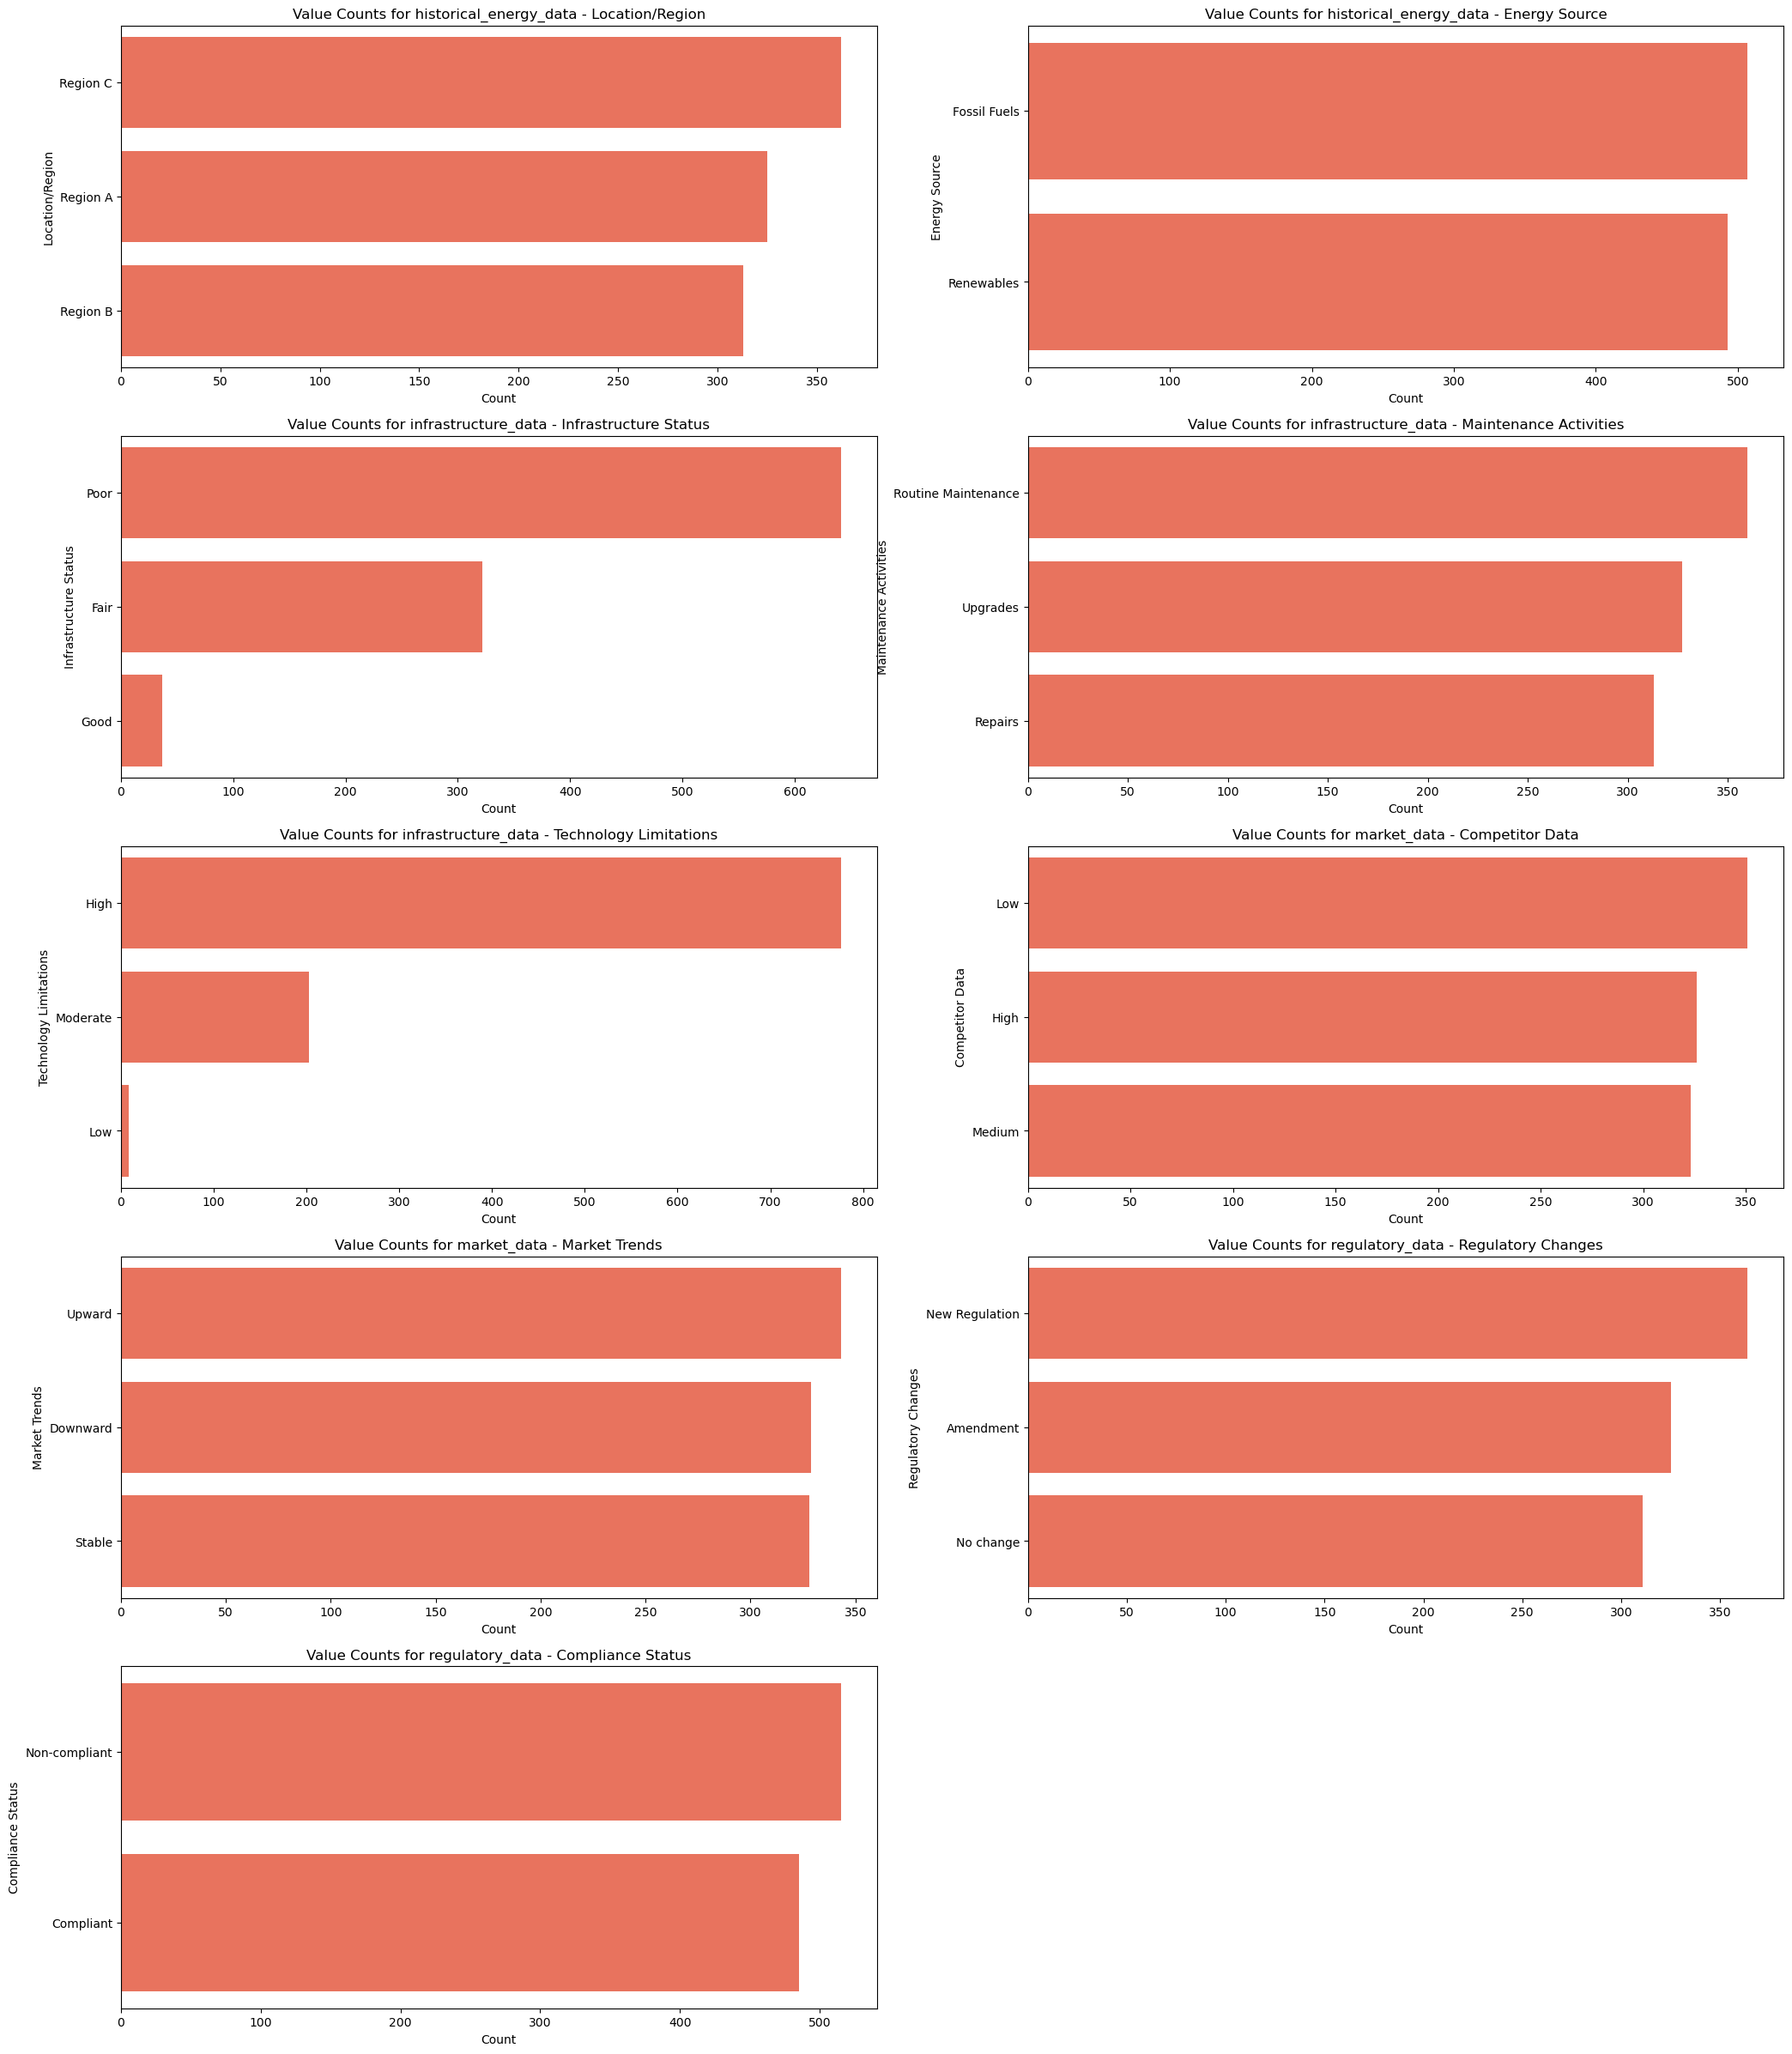

In [86]:
#Visualizing 
#Calculate the nummber of the rows and columns for the subplots

num_rows = (len(categorical_values_counts) + 1) // 2
num_cols = 2

#Create a grid of the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize = (25, 30))

#flatten the axes array for easier indexing
axes = axes.flatten()

#Itterate through categorical columns and plot them in subplots 
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y=counts.index, ax=ax, color="tomato")
    ax.set_title(f"Value Counts for {dataset} - {column}")
    ax.set_xlabel("Count")
    ax.set_ylabel(column)

#Hiide any remaining empty subplots
for i in range(len(categorical_values_counts),num_rows * num_cols):
    fig.delaxes(axes[i])
    
#Adjust
plt.tight_layout

plt.show()
                  

## EDA - Demand, Product And Consumption 1
  * We will start by examining the trends in energy, demand,production and consumption from the historical_energy_dataset
  * This will give us insights into fluactuations and potential in the energy market

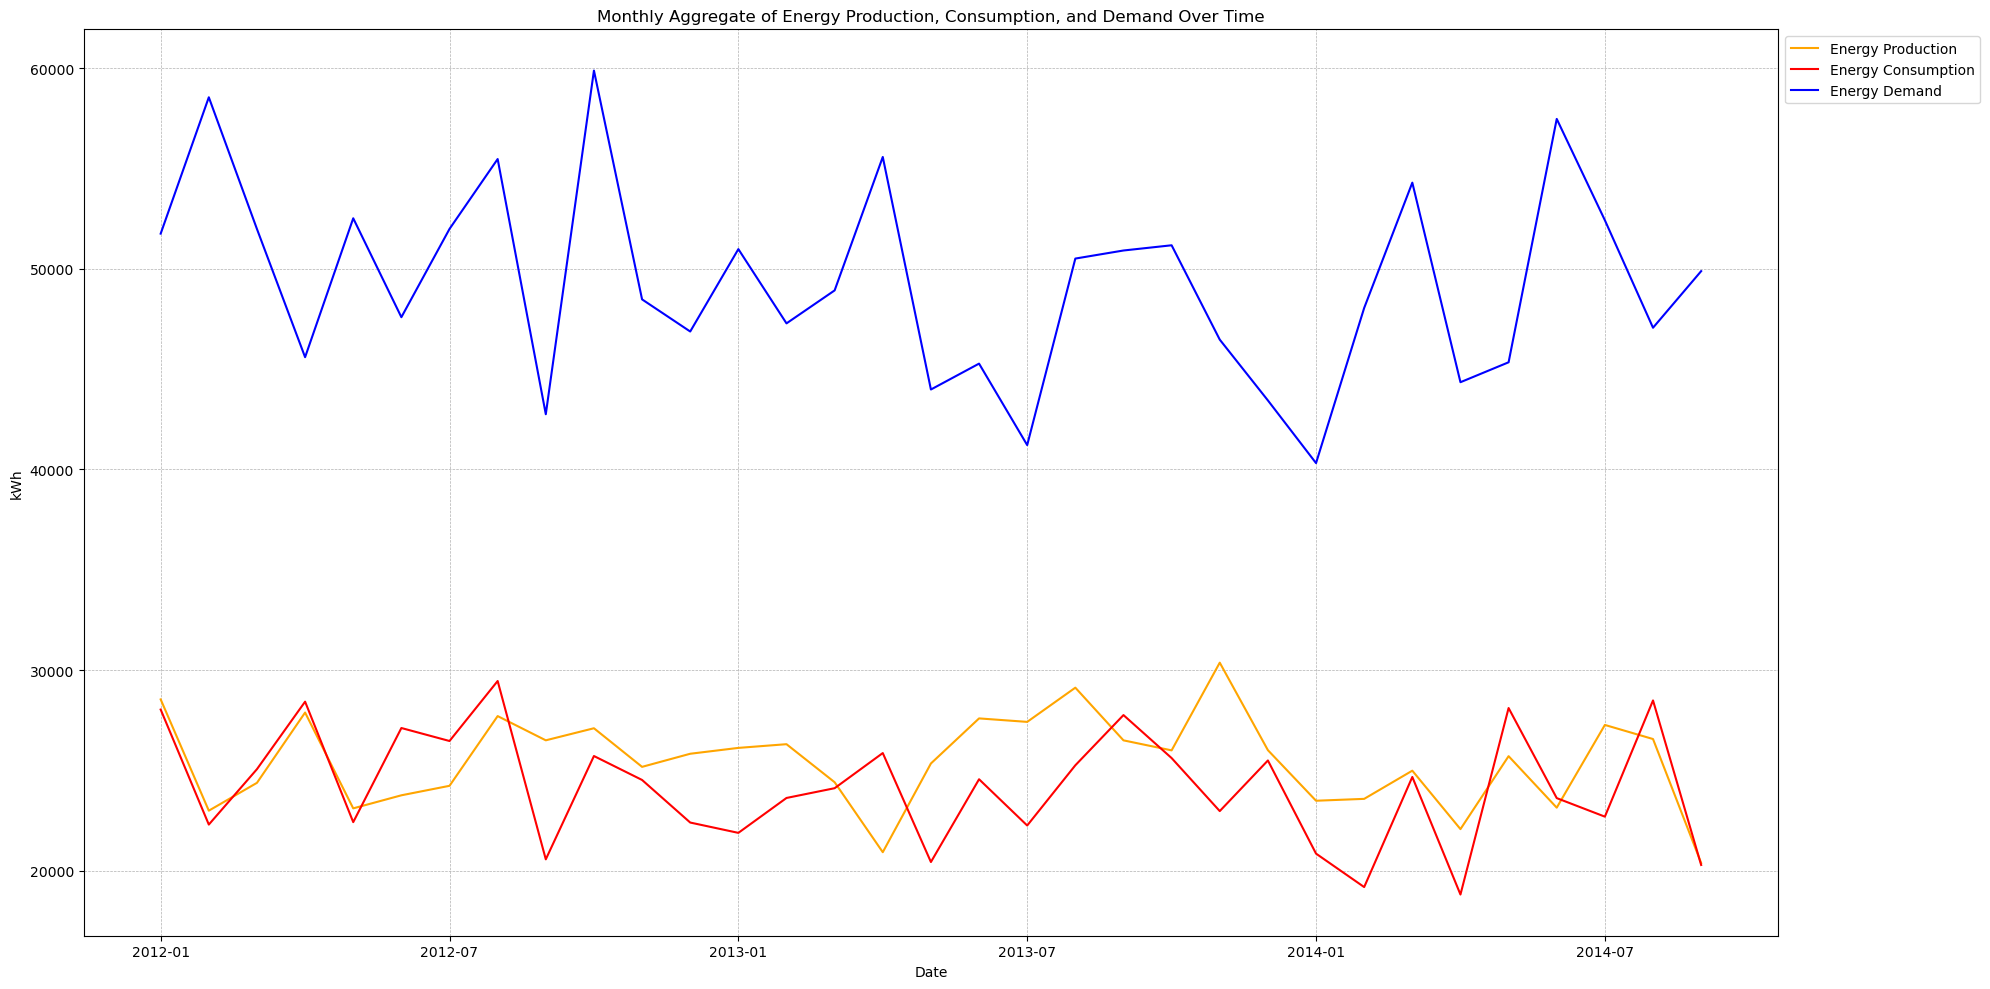

In [22]:
#Extract the month and year from the "Date/Time" column
historical_energy_data["Year"] = historical_energy_data["Date/Time"].dt.year
historical_energy_data["Month"] = historical_energy_data["Date/Time"].dt.month

#Create a new column called "Year-Month" for easy plotting
historical_energy_data["Year-Month"] = historical_energy_data["Date/Time"].dt.to_period("M")

# selecting numerical columns
numeric_column = ['Energy Production (kWh)', 'Energy Consumption (kWh)', 'Energy Demand']

# Convert selected columns to numeric if needed (as precaution, if not already numeric)
for col in numeric_column:
    historical_energy_data[col] = pd.to_numeric(historical_energy_data[col], errors='coerce')

#Aggregate data on a monthly basis
monthly_data = historical_energy_data.groupby("Year-Month")[numeric_column].mean()

#Setting fisize
plt.figure(figsize = (20, 10))

#Plottting 
sns.lineplot(data = monthly_data,x = monthly_data.index.astype(str),y = "Energy Production (kWh)", label = "Energy Production", color = "orange",linestyle="-",linewidth = 1.5,errorbar= None)
sns.lineplot(data = monthly_data,x = monthly_data.index.astype(str),y = "Energy Consumption (kWh)", label = "Energy Consumption", color = "red",linestyle="-",linewidth = 1.5, errorbar = None)
sns.lineplot(data = monthly_data,x = monthly_data.index.astype(str),y = "Energy Demand", label = "Energy Demand", color = "blue", linestyle="-",linewidth = 1.5,errorbar = None)

#Setting the title and labels 
plt.title('Monthly Aggregate of Energy Production, Consumption, and Demand Over Time')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle="--", linewidth=0.5)


#Setting our labels
labels = monthly_data.index.astype(str).tolist()
n = 6
plt.xticks(labels[::n],rotation =  360)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

plt.show()


In [23]:
monthly_data

,Energy Production (kWh),Energy Consumption (kWh),Energy Demand
Year-Month,,,
2012-01,28536.064516,28030.741935,51746.612903
2012-02,22991.448276,22298.310345,58542.068966
2012-03,24378.741935,25060.096774,51976.903226
2012-04,27881.266667,28423.733333,45590.000000
2012-05,23105.903226,22419.709677,52512.258065
2012-06,23757.200000,27110.133333,47582.700000
2012-07,24230.225806,26462.903226,51981.612903
2012-08,27704.741935,29452.677419,55464.225806
2012-09,26497.000000,20565.800000,42747.233333


## EDA - Energy Price And Market Price
  * To understand the pricing dynamics and its relation to market trends 
 * Visualization of the market price from the market_data dataset alongside the Energy Price from the historical_energy_data dataset oveer time 

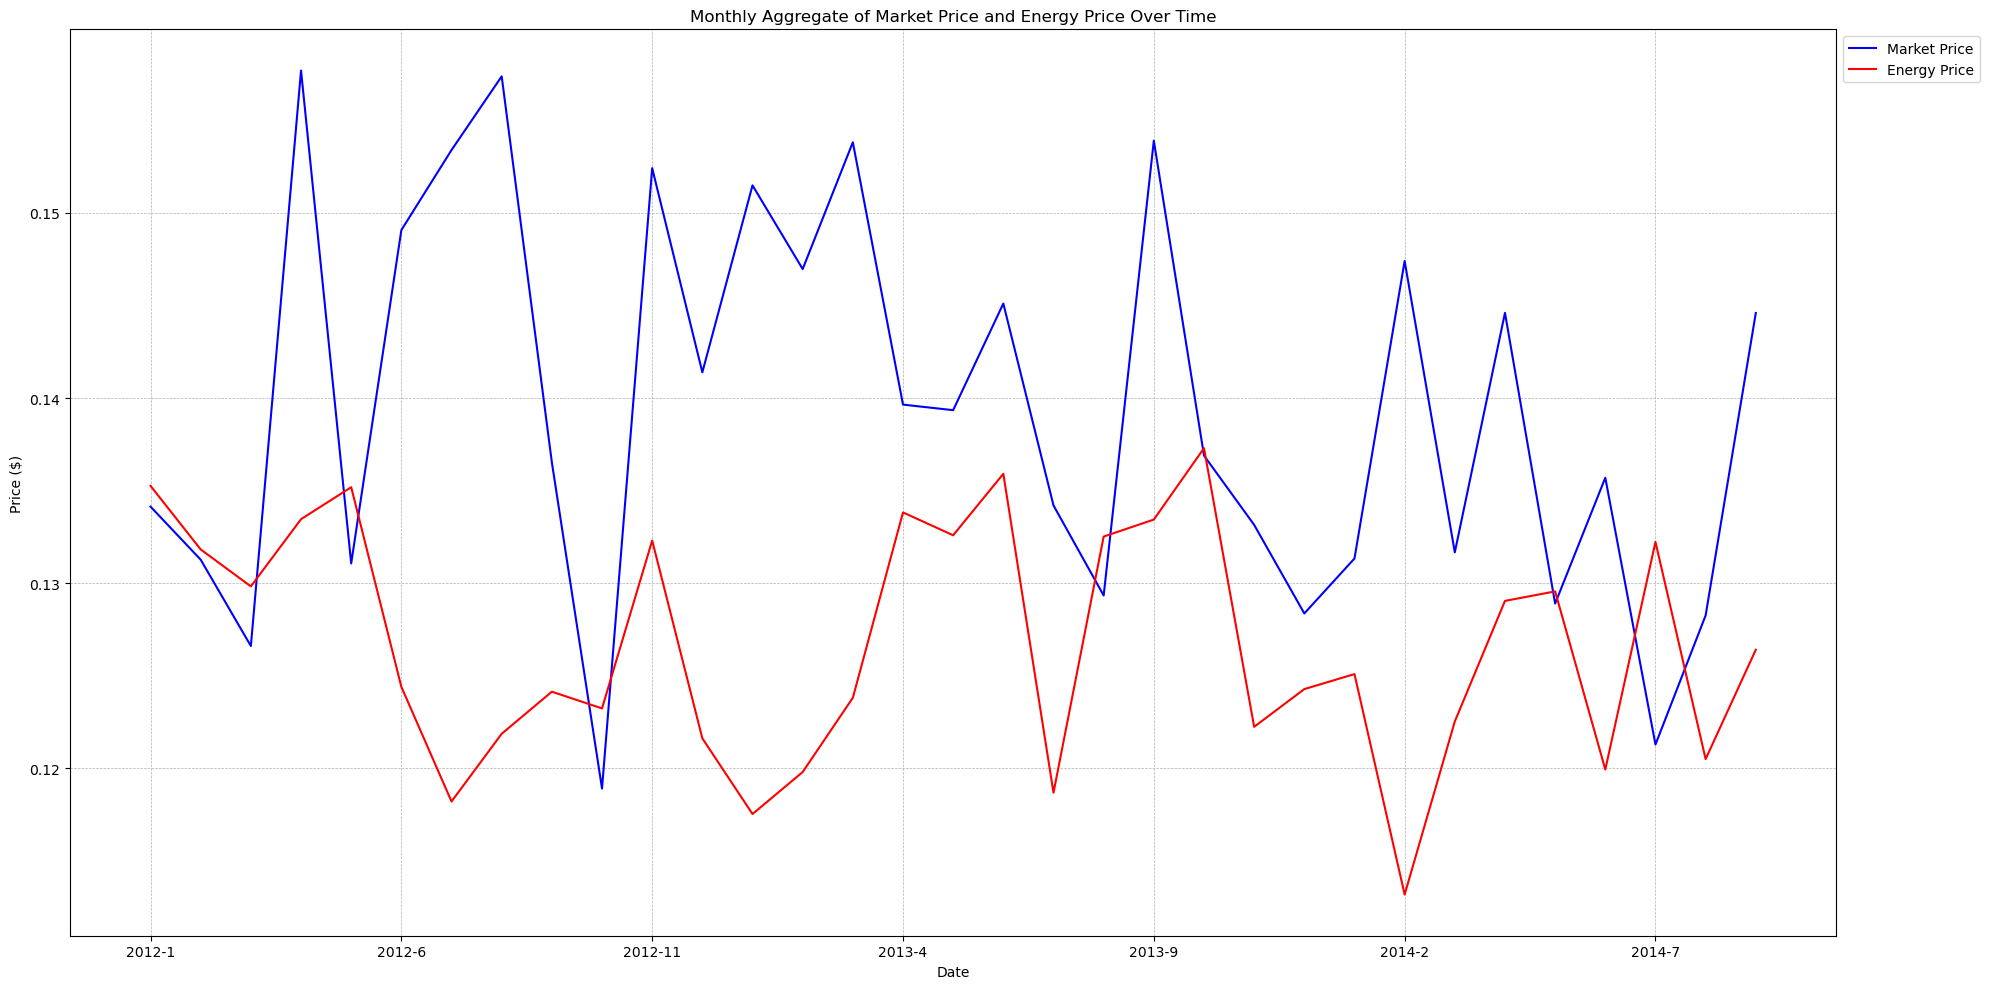

In [24]:
#Inner merge historical_energy_data and market_data together on Date/Time for easy combined analysis
merged_data = pd.merge(historical_energy_data,market_data, on = "Date/Time", how = "inner")

#Set "Date/Time" as the index for aggregates of the df
merged_data["Year"] = merged_data["Date/Time"].dt.year
merged_data["Month"] = merged_data["Date/Time"].dt.month

#Aggregate the data  on monthly basis
monthly_merged_data = merged_data.groupby(["Year","Month"])[['Market Price', 'Energy Price']].mean()

#Create a new "Year-Month" column for plotting
monthly_merged_data["Year-Month"] = monthly_merged_data.index.get_level_values(0).astype(str)+ "-" + monthly_merged_data.index.get_level_values(1).astype(str)

plt.figure(figsize = (20, 10))

sns.lineplot(data = monthly_merged_data, x = "Year-Month", y = "Market Price", label = "Market Price", color = "blue", linestyle = "-",linewidth = 1.5, errorbar = None)
sns.lineplot(data = monthly_merged_data, x = "Year-Month", y = "Energy Price", label = "Energy Price", color = "red", linestyle = "-",linewidth = 1.5, errorbar = None)
plt.title("Monthly Aggregate of Market Price and Energy Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")        
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle="--", linewidth=0.5)


#Setting our labels
labels = monthly_merged_data["Year-Month"].tolist()
n = 5
plt.xticks(labels[::n],rotation =  360)
plt.tight_layout()

plt.show()             

In [25]:
merged_data

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Year,Month,Year-Month,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,2012,1,2012-01,0.167891,High,Upward,13518
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,2012,1,2012-01,0.151762,Medium,Upward,2115
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523,2012,1,2012-01,0.241443,High,Stable,22353
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205,2012,1,2012-01,0.071104,Low,Downward,25482
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548,2012,1,2012-01,0.107281,High,Stable,20264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014-09-22,Region C,Renewables,10854,14036,0.178223,1630.754688,8119,2014,9,2014-09,0.232041,Low,Upward,14183
996,2014-09-23,Region B,Renewables,53076,2100,0.107236,3065.359275,33949,2014,9,2014-09,0.201107,Low,Downward,6048
997,2014-09-24,Region C,Fossil Fuels,57950,6200,0.161005,4171.378135,48855,2014,9,2014-09,0.244855,High,Upward,36997
998,2014-09-25,Region B,Renewables,18349,39339,0.144155,2730.569922,2645,2014,9,2014-09,0.077592,Low,Stable,27240


## EDA - Demand Correlation With Energy Price
  * Let's check if the energy demand is influenced by the current price

In [26]:
#Inner merge historical_energy_data and market_data together on Date/Time
merged_data1 = pd.merge(historical_energy_data, market_data,  on = "Date/Time", how = "inner")

correlation_energy_price = merged_data1["Energy Demand"].corr(merged_data1["Energy Price"])
correlation_market_price = merged_data1["Market Demand"].corr(merged_data1["Market Price"])

In [27]:
#Correlation of energy of price
correlation_energy_price

-0.005361840768503358

In [28]:
#Correlation of Market of price
correlation_market_price

0.02980230214828854

## EDA - Infrastructure Status And Tech Limitations
* To understand the state of infrastructure and technology over time 
* We will visualize the frequency of various infrastructure Status values and the distribution of Technology Limitations from the infrastructure_data dataset

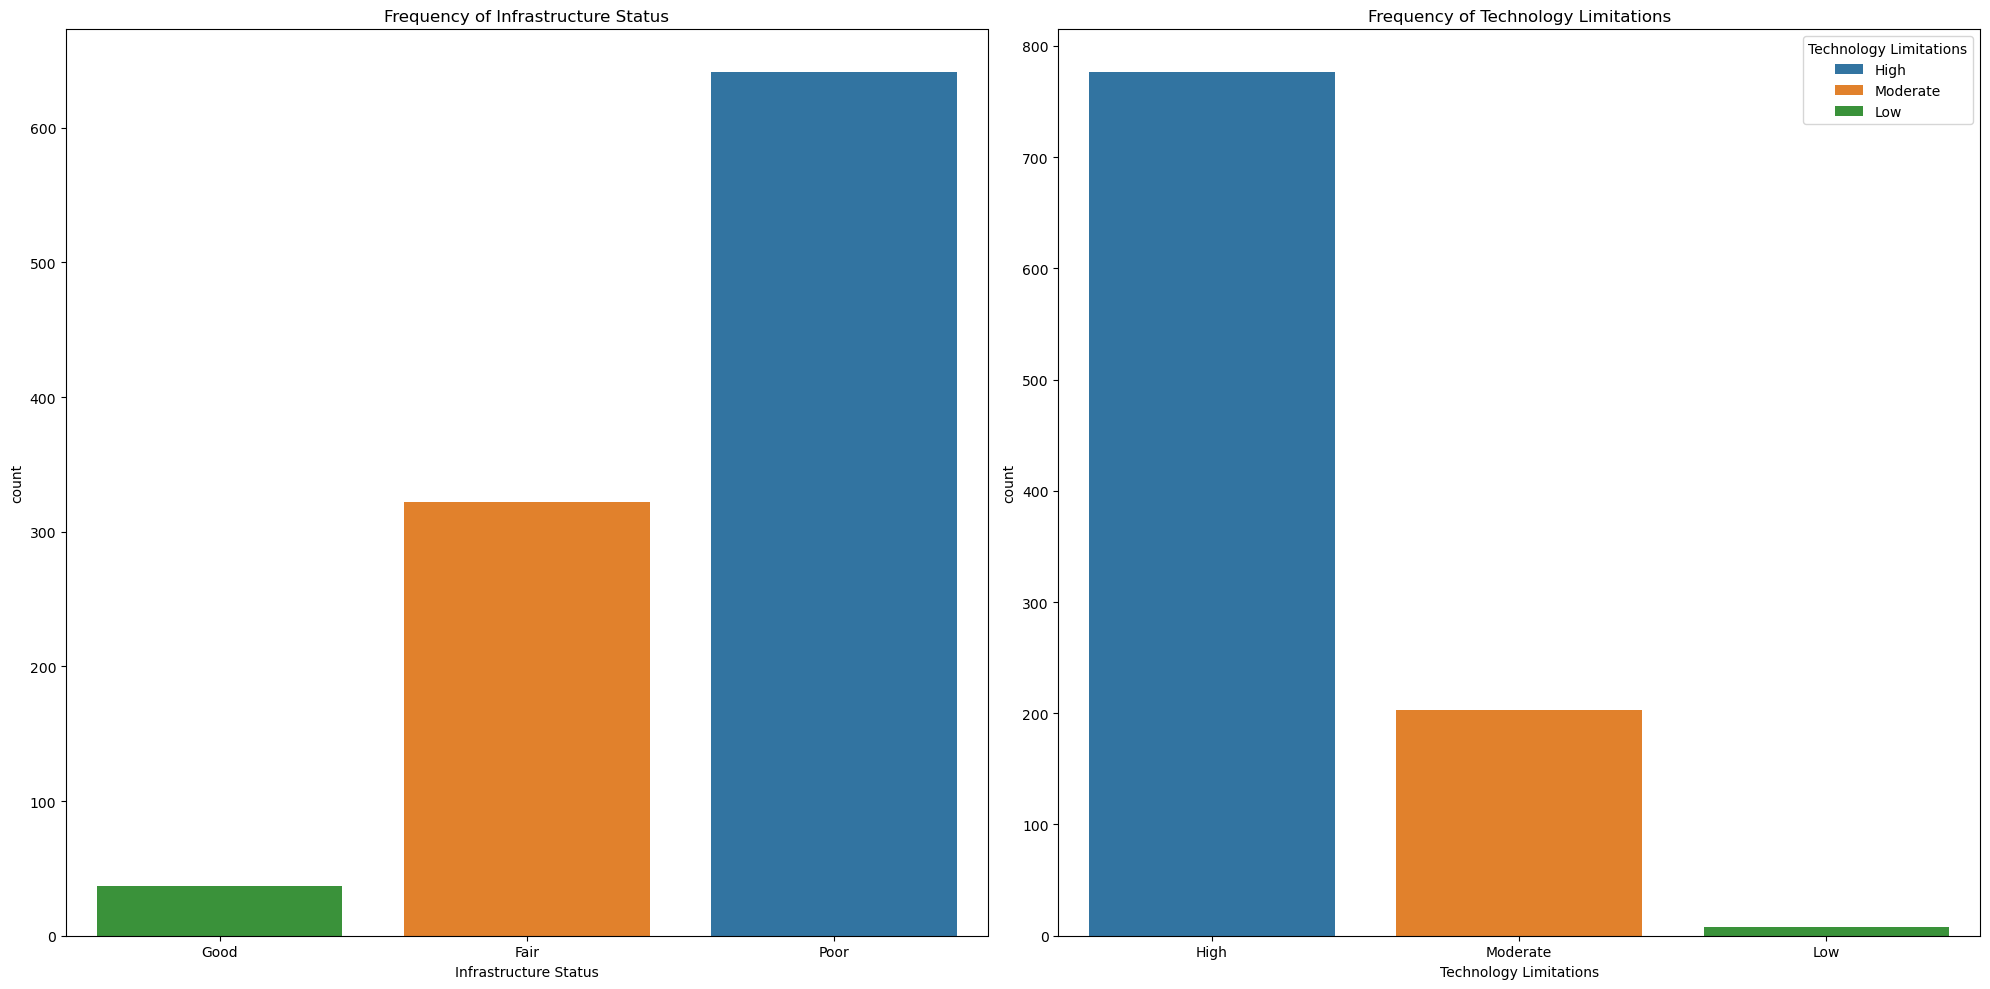

In [29]:
#Set up the figsize and axes
fig, axes = plt.subplots(1,2,figsize=(20,10))

# plotting the frequency of infrstructure status
sns.countplot(data=infrastructure_data, x = "Infrastructure Status", ax=axes[0],order=["Good","Fair","Poor"], hue = "Infrastructure Status" )
axes[0].set_title("Frequency of Infrastructure Status")
axes[0].set_xlabel("Infrastructure Status")
axes[0].set_ylabel("count")

# plotting the frequency of technology limitations
sns.countplot(data = infrastructure_data, x = "Technology Limitations", ax=axes[1],  hue = "Technology Limitations")
axes[1].set_title("Frequency of Technology Limitations")
axes[1].set_xlabel("Technology Limitations")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()

## EDA - Correlation Between Infrastructure Status And Tech Limitations

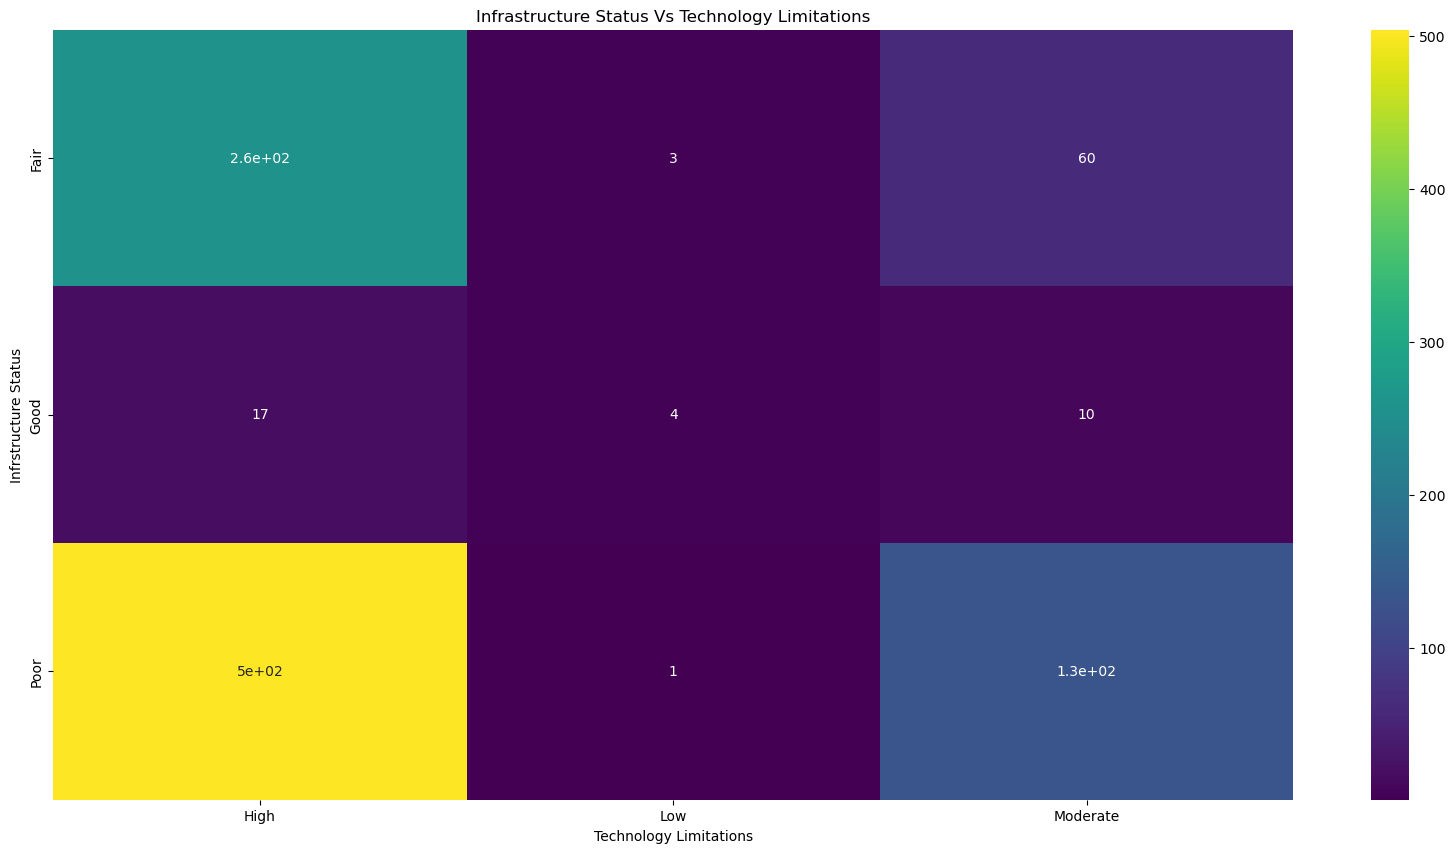

In [35]:
ct = pd.crosstab(infrastructure_data["Infrastructure Status"], infrastructure_data["Technology Limitations"])

plt.figure(figsize = (20,10))

sns.heatmap(ct, annot = True, cmap = "viridis")
plt.title("Infrastructure Status Vs Technology Limitations")
plt.xlabel("Technology Limitations")
plt.ylabel("Infrstructure Status")

plt.tight_layout
plt.show()

## EDA - Correlation Of High Tech Limitations, Poor Infrastructure Status And Energy Production
* Correlation betwwen poor infrastructure  status and high technology limitation and the energy production

In [46]:
infrastructure_data["Poor_Infrastructure"] = infrastructure_data["Infrastructure Status"].apply(lambda x: 1 if x == "Poor" else 0)
infrastructure_data["High_Tech_Limitations"] = infrastructure_data["Technology Limitations"].apply(lambda x: 1 if x == "High" else 0)

infrastructure_data["Combined"] = infrastructure_data["Poor_Infrastructure"] * infrastructure_data["High_Tech_Limitations"]

merged_data = pd.merge(historical_energy_data, infrastructure_data, on = "Date/Time", how = "inner")

correlation_coefficient = merged_data["Energy Production (kWh)"].corr(merged_data["Combined"])

In [47]:
correlation_coefficient

-0.015877155348918308

#### Observation from the correlation Of High Tech Limitations, Poor Infrastructure Status And Energy Production

* This negative correlation above implies that when both infrastructure and technology limitations are poor, there is a slight decrease in energy production.
This suggests that poor infrastructure and technology limitations are contributing factors to low energy production.


In [50]:
merged_data

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Year,Month,Year-Month,Infrastructure Status,Maintenance Activities,Technology Limitations,Poor_Infrastructure,High_Tech_Limitations,combined,Combined
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,2012,1,2012-01,Poor,Repairs,High,1,1,1,1
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,2012,1,2012-01,Poor,Upgrades,High,1,1,1,1
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523,2012,1,2012-01,Fair,Upgrades,High,0,1,0,0
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205,2012,1,2012-01,Poor,Repairs,High,1,1,1,1
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548,2012,1,2012-01,Poor,Repairs,High,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014-09-22,Region C,Renewables,10854,14036,0.178223,1630.754688,8119,2014,9,2014-09,Fair,Repairs,Moderate,0,0,0,0
996,2014-09-23,Region B,Renewables,53076,2100,0.107236,3065.359275,33949,2014,9,2014-09,Poor,Upgrades,NaN,1,0,0,0
997,2014-09-24,Region C,Fossil Fuels,57950,6200,0.161005,4171.378135,48855,2014,9,2014-09,Good,Routine Maintenance,Moderate,0,0,0,0
998,2014-09-25,Region B,Renewables,18349,39339,0.144155,2730.569922,2645,2014,9,2014-09,Fair,Upgrades,Low,0,0,0,0


## EDA - Regulatory Changes And Compliance Cost
* To understand the impact of regulatory changes 
* We will visualize the frequency of various Regualatory Changes and the distribution if Compliances Costs asssociated with these changes from the regulatory_data dataset

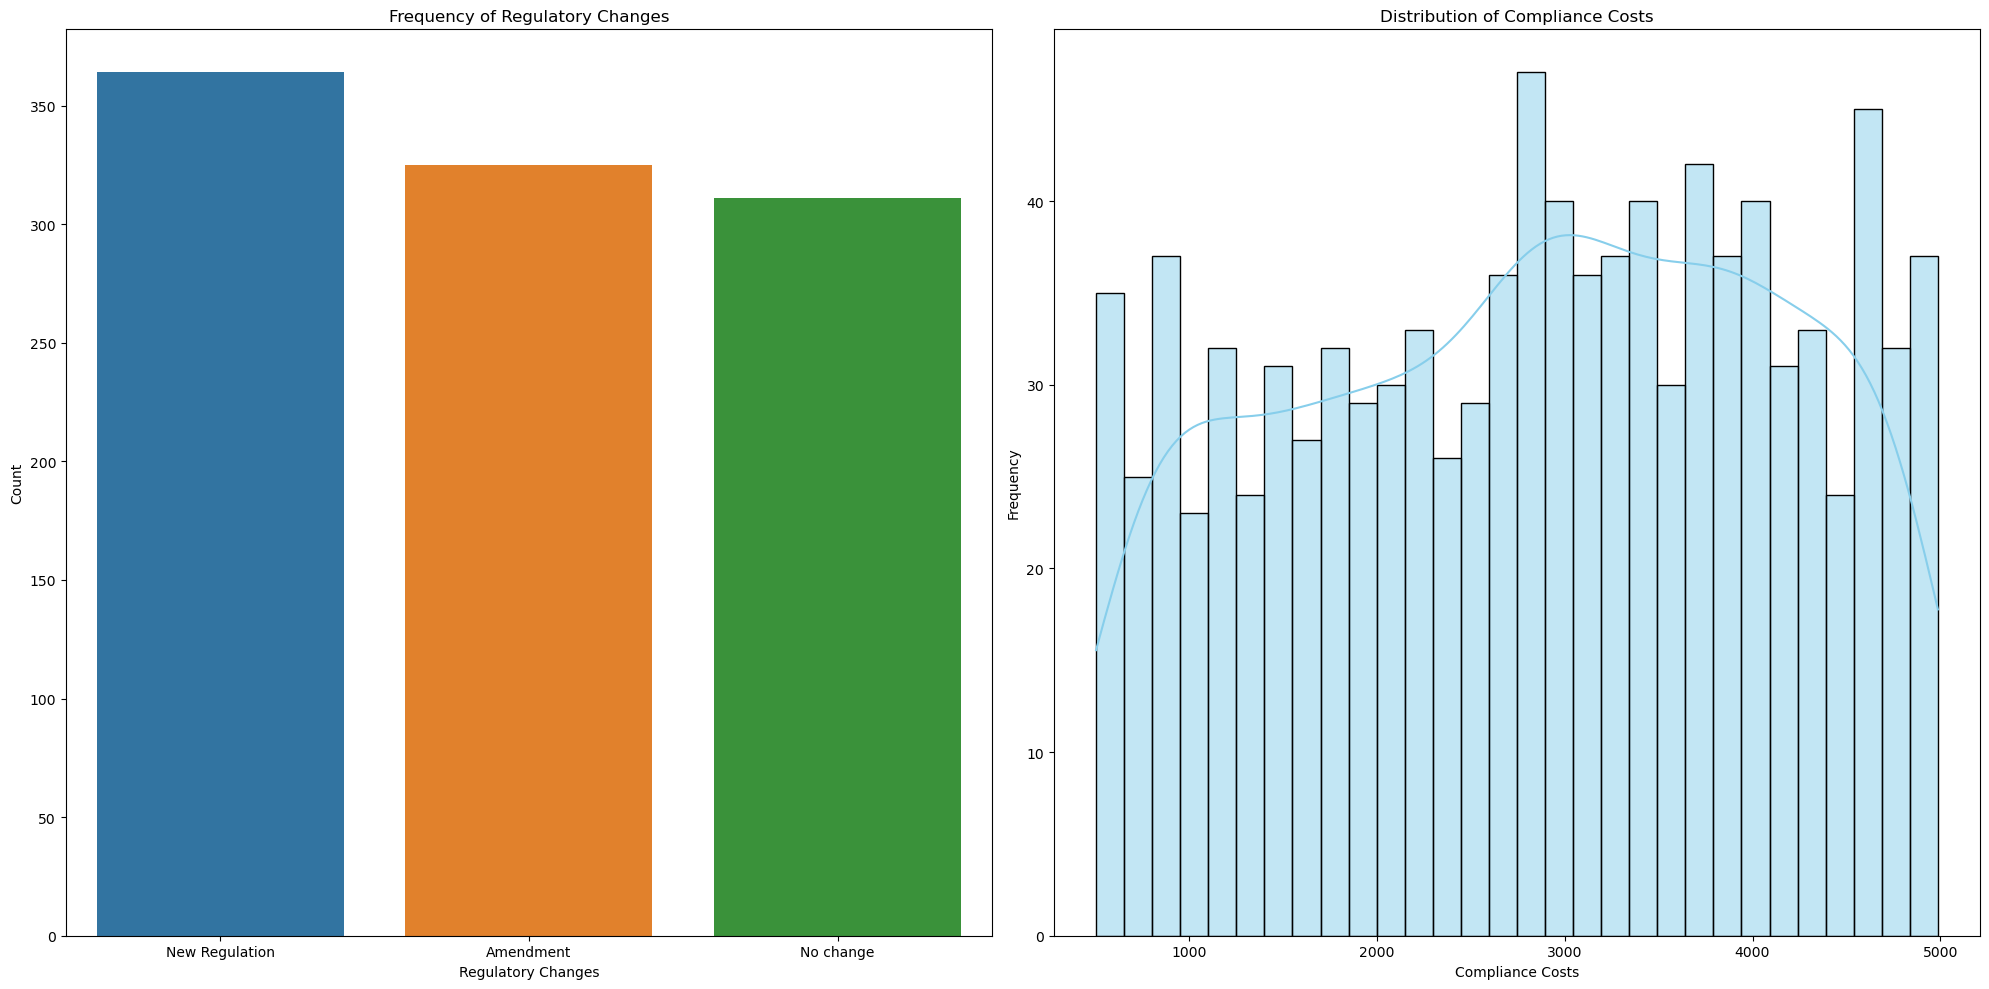

In [92]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

sns.countplot(data = regulatory_data, x = "Regulatory Changes", ax = ax1, hue = "Regulatory Changes" )
ax1.set_title("Frequency of Regulatory Changes")
ax1.set_xlabel("Regulatory Changes")
ax1.set_ylabel("Count")

sns.histplot(data = regulatory_data, x = "Compliance Costs", ax = ax2,bins =30, kde=True, color = "skyblue" )
ax2.set_title("Distribution of Compliance Costs")
ax2.set_xlabel("Compliance Costs")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## EDA - Cost Vs Revenue
#### Impact of Regulatory Changes and Operational Costs on Revenue
* We will visualize the relationship between regulatory changes and the associated compliance costs as well as the operational costs to the Revenue generated from the company
* Revenue = Energy Consumption * Energy Price
* This will provide insights into the financial implications of regulatory changes cost and operational cost for Energix Enterprise.rise

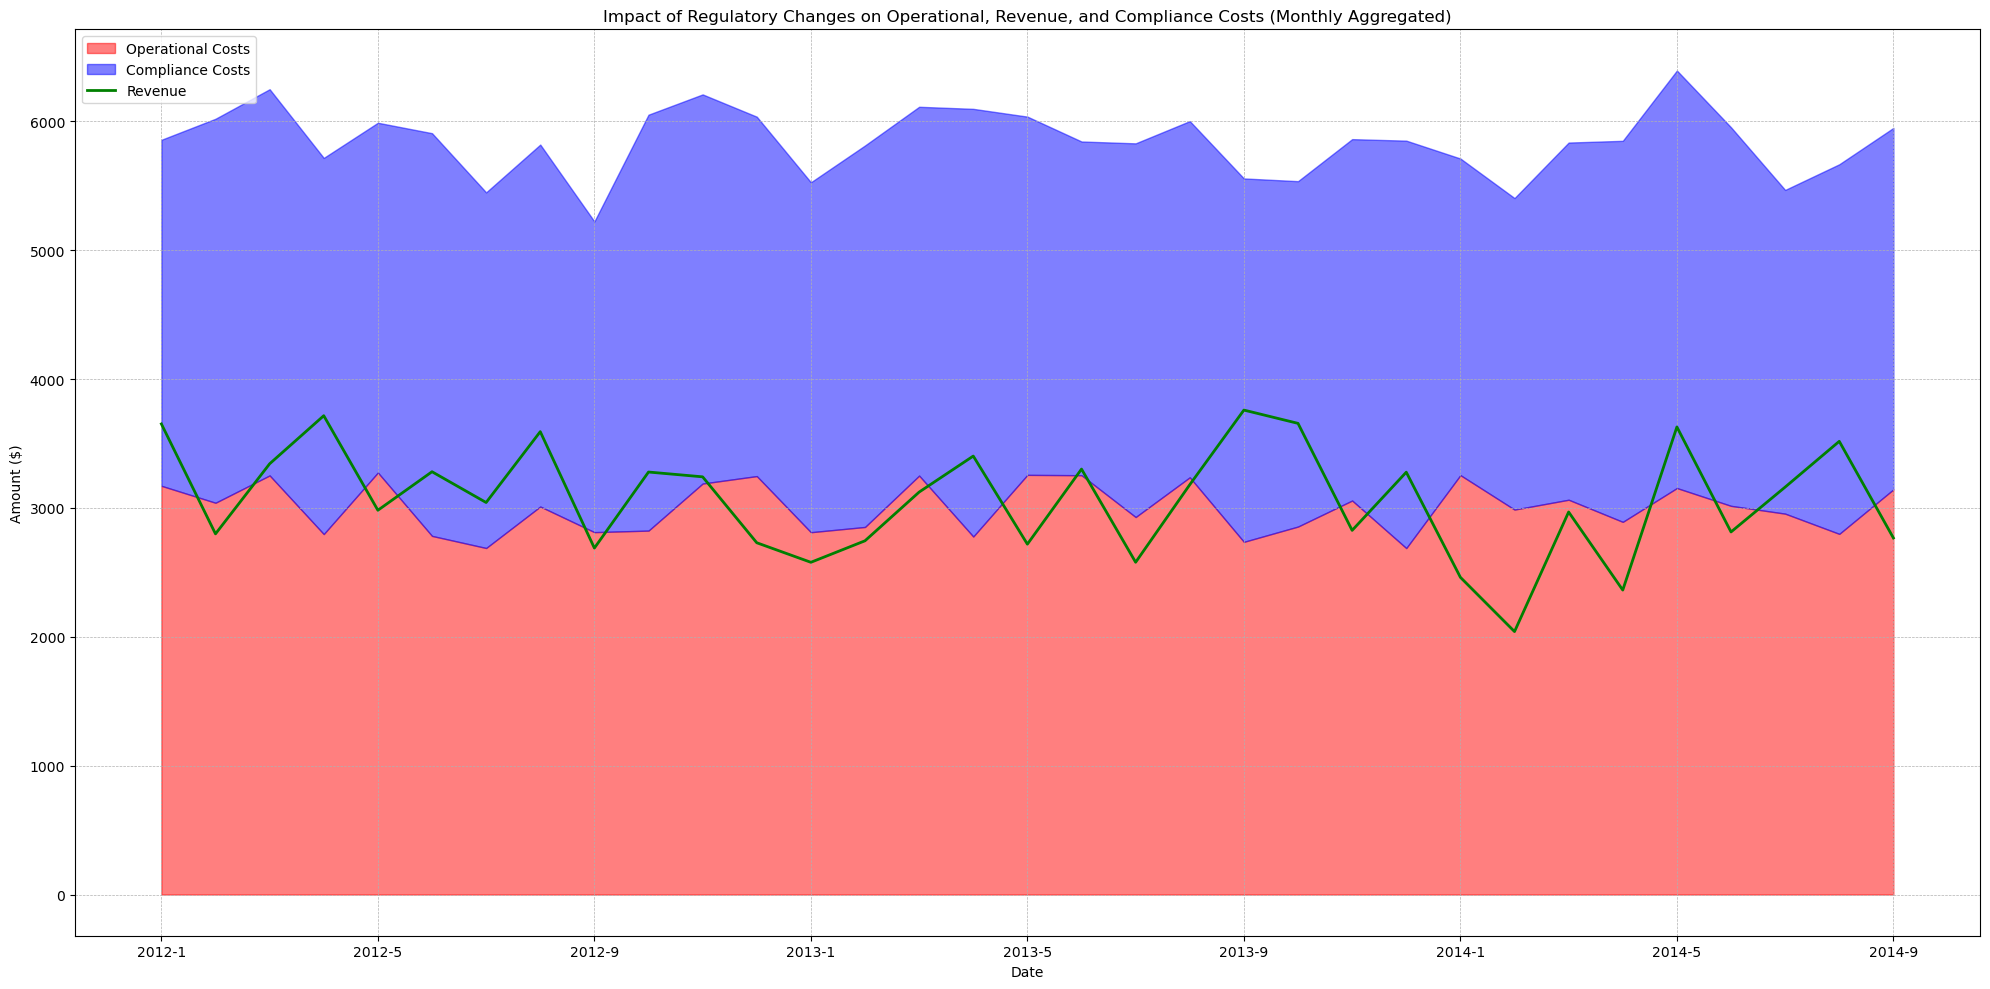

In [96]:
historical_energy_data["Revenue"] = historical_energy_data["Energy Price"] * historical_energy_data["Energy Consumption (kWh)"]

merged_regulatory_data = pd.merge(historical_energy_data, regulatory_data, on = "Date/Time", how = "inner")

merged_regulatory_data["Year"] = merged_regulatory_data["Date/Time"].dt.year
merged_regulatory_data["Month"] = merged_regulatory_data["Date/Time"].dt.month

monthly_aggregated_data = merged_regulatory_data.groupby(["Year","Month"])[["Operational Costs", "Compliance Costs", "Revenue"]].mean().reset_index()

monthly_aggregated_data["Year-Month"] = monthly_aggregated_data["Year"].astype(str) + '-' + monthly_aggregated_data["Month"].astype(str)

plt.figure(figsize = (20,10))

plt.fill_between(monthly_aggregated_data["Year-Month"], monthly_aggregated_data["Operational Costs"], color = "red", label="Operational Costs",alpha = 0.5)
plt.fill_between(monthly_aggregated_data["Year-Month"], monthly_aggregated_data["Operational Costs"],monthly_aggregated_data["Operational Costs"] + monthly_aggregated_data["Compliance Costs"], color = "blue", label = "Compliance Costs", alpha = 0.5)

sns.lineplot(data = monthly_aggregated_data, x = "Year-Month", y = "Revenue", label = "Revenue", color = "green", linewidth = 2)
plt.title("Impact of Regulatory Changes on Operational, Revenue, and Compliance Costs (Monthly Aggregated)")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend(loc = "upper left")
plt.grid(True, which = "both",linestyle = "--",linewidth = 0.5)
labels = monthly_aggregated_data["Year-Month"].tolist()
n = 4
plt.xticks(labels[::n], rotation = 360)

plt.tight_layout()
plt.show()

## EDA - Renewables
#### Analyzing Competition from Renewable Energy Providers
* To understand the competition from renewable energy providers and it's impact on Energix Enterprise, we will analyze the Energy Source column from the historical_energy_data dataset
* We will visualize the trends in energy production based on the energy source (Fossil Fuels Vs Renewables) over time. This will give us insights into how the production from renewables has evolved and potentially affected the company's market share

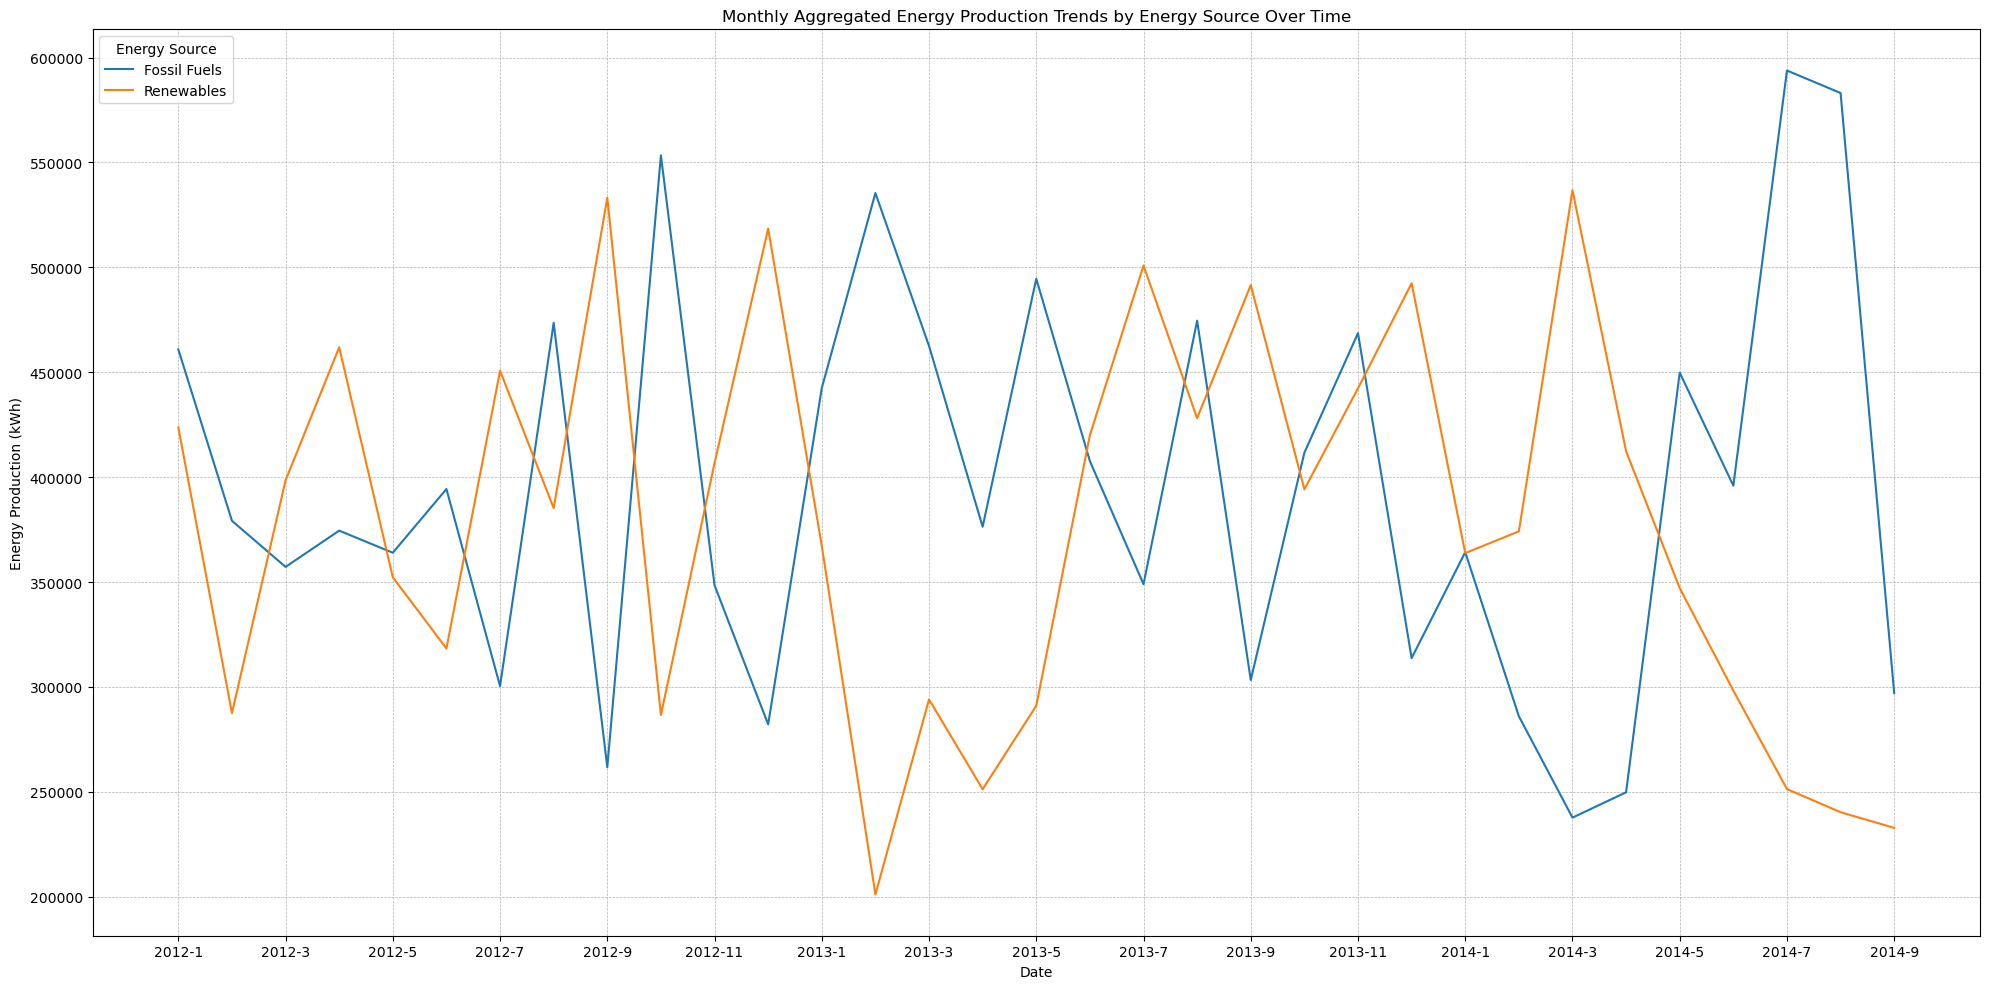

In [97]:
historical_energy_data["Year"] = historical_energy_data["Date/Time"].dt.year
historical_energy_data["Month"] = historical_energy_data["Date/Time"].dt.month


monthly_aggregated_data = historical_energy_data.groupby(["Year","Month","Energy Source"])["Energy Production (kWh)"].sum().reset_index()

monthly_aggregated_data["Year-Month"] = monthly_aggregated_data["Year"].astype(str) + '-' + monthly_aggregated_data["Month"].astype(str)

plt.figure(figsize = (20,10))

sns.lineplot(data=monthly_aggregated_data, x = "Year-Month", y = "Energy Production (kWh)", hue="Energy Source", errorbar=None)

plt.title("Monthly Aggregated Energy Production Trends by Energy Source Over Time")
plt.xlabel("Date")
plt.ylabel("Energy Production (kWh)")
plt.legend(title = "Energy Source")

plt.grid(True, which = "both",linestyle = "--",linewidth = 0.5)
labels = monthly_aggregated_data["Year-Month"].tolist()
n = 4
plt.xticks(labels[::n], rotation = 360)

plt.tight_layout()
plt.show()